# Obtención de datos
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.shape

(271116, 15)

In [4]:
contenders = df["Name"].size
print(contenders)

271116


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Visualicemos la columna "Medal"

In [6]:
medal_count = df["Medal"].value_counts()
print(medal_count)

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [7]:
medal_count.index

Index(['Gold', 'Bronze', 'Silver'], dtype='object')

In [8]:
medal_total = 0
for i in range(medal_count.size):
    medal_total = medal_total + medal_count[i]
print("El total de medallas es: " + str(medal_total))

no_medal = contenders - medal_total
print("Participantes sin medallas: " + str(no_medal))

El total de medallas es: 39783
Participantes sin medallas: 231333


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

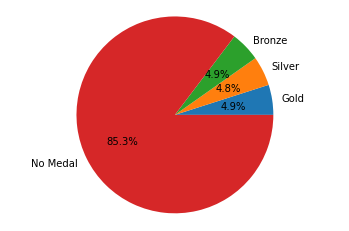

In [10]:
labels = [medal_count.index[0], medal_count.index[2], medal_count.index[1], 'No Medal']
sizes = [medal_count[0], medal_count[2], medal_count[1], no_medal]

fig = plt.figure()
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

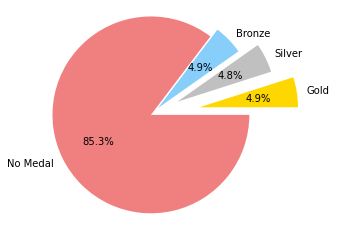

In [11]:
labels = [medal_count.index[0], medal_count.index[2], medal_count.index[1], 'No Medal']
sizes = [medal_count[0], medal_count[2], medal_count[1], no_medal]
explode = (0.5, 0.3, 0.1, 0)
colors = ['gold', 'silver', 'lightskyblue', 'lightcoral']

fig = plt.figure()
plt.pie(sizes, explode = explode, colors = colors, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# Separemos el df por los tipos de medallas.

### Oro

In [12]:
gold = df[df['Medal'] == "Gold"]
gold = gold.drop(['Medal'], axis =1)
gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G


In [13]:
print(gold.shape)
gold.describe()

(13372, 14)


,ID,Age,Height,Weight,Year
count,13372.000000,13224.000000,10539.000000,10254.000000,13372.000000
mean,69358.276473,25.901013,177.898472,74.183879,1973.131618
std,39029.340607,5.892887,11.052521,15.207425,34.179153
min,4.000000,13.000000,136.000000,28.000000,1896.000000
25%,36055.250000,22.000000,170.000000,63.000000,1952.000000
50%,69076.500000,25.000000,178.000000,73.000000,1984.000000
75%,103707.000000,29.000000,185.000000,84.000000,2002.000000
max,135553.000000,64.000000,223.000000,170.000000,2016.000000


### Plata

In [14]:
silver = df[df['Medal'] == "Silver"].drop(['Medal'], axis =1)
silver.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined
86,25,Alf Lied Aanning,M,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System"
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls
106,38,Karl Jan Aas,M,20.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System"


In [15]:
print(silver.shape)
silver.describe()

(13116, 14)


,ID,Age,Height,Weight,Year
count,13116.000000,12821.000000,10167.000000,9975.000000,13116.000000
mean,69249.335011,25.996724,177.458247,73.644962,1973.509607
std,38806.260769,6.017395,10.820082,14.807099,34.083531
min,20.000000,11.000000,136.000000,30.000000,1896.000000
25%,36647.750000,22.000000,170.000000,63.000000,1952.000000
50%,68790.500000,25.000000,178.000000,73.000000,1984.000000
75%,103085.250000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,167.000000,2016.000000


### Bronce

In [16]:
bronze = df[df['Medal'] == "Bronze"].drop(['Medal'], axis =1)
bronze.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around


In [17]:
print(bronze.shape)
bronze.describe()

(13295, 14)


,ID,Age,Height,Weight,Year
count,13295.000000,13006.000000,10366.000000,10227.000000,13295.000000
mean,69611.702971,25.879210,177.298283,73.479010,1975.189169
std,38714.071526,5.831923,10.794729,15.017676,33.165118
min,15.000000,10.000000,136.000000,28.000000,1896.000000
25%,36829.000000,22.000000,170.000000,63.000000,1956.000000
50%,69093.000000,25.000000,178.000000,72.000000,1984.000000
75%,103558.000000,29.000000,184.000000,82.000000,2002.000000
max,135563.000000,72.000000,223.000000,182.000000,2016.000000


# Filtremos el df de medallas de oro por equipo.

In [18]:
team_count = gold["Team"].value_counts()
print(team_count)

United States                  2474
Soviet Union                   1058
Germany                         679
Italy                           535
Great Britain                   519
                               ... 
Costa Rica                        1
Panama                            1
Mozambique                        1
Bonaparte                         1
Individual Olympic Athletes       1
Name: Team, Length: 242, dtype: int64


In [19]:
gold_grouped = gold.groupby('Team')
gold_filter = gold_grouped.filter(lambda x: x['Team'].count()>400)
gold_filter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
150,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Team"
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball
200,93,Jol Marc Abati,M,38.0,190.0,85.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball
218,106,Agostino Abbagnale,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls


In [20]:
print(gold_filter.shape)
gold_filter.describe()

(7025, 14)


,ID,Age,Height,Weight,Year
count,7025.000000,7012.000000,5506.000000,5316.000000,7025.000000
mean,67339.920854,25.927981,179.220850,75.840952,1969.069893
std,38874.600879,5.984464,10.902986,14.787611,33.692699
min,56.000000,13.000000,136.000000,30.000000,1896.000000
25%,34233.000000,22.000000,172.000000,66.000000,1948.000000
50%,66946.000000,25.000000,180.000000,75.000000,1976.000000
75%,101556.000000,29.000000,186.000000,84.000000,1998.000000
max,135553.000000,64.000000,223.000000,163.000000,2016.000000


In [21]:
team_count = gold_filter["Team"].value_counts()
print(team_count)

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
Name: Team, dtype: int64


In [22]:
team_count.index

Index(['United States', 'Soviet Union', 'Germany', 'Italy', 'Great Britain',
       'France', 'Sweden', 'Hungary', 'Canada'],
      dtype='object')

In [23]:
sizes = team_count.tolist()
print(sizes)

[2474, 1058, 679, 535, 519, 455, 451, 432, 422]


In [24]:
labels = team_count.index.tolist()
print(labels)

['United States', 'Soviet Union', 'Germany', 'Italy', 'Great Britain', 'France', 'Sweden', 'Hungary', 'Canada']


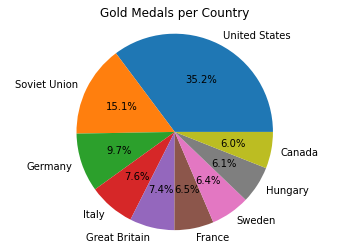

In [25]:
fig = plt.figure()
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Gold Medals per Country")
plt.show()

# Filtremos el df de medallas de plata por equipo.

In [26]:
silver_grouped = silver.groupby('Team')
silver_filter = silver_grouped.filter(lambda x: x['Team'].count()>400)
silver_filter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle"
223,107,Carmine Abbagnale,M,30.0,182.0,90.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs
228,108,Giuseppe Abbagnale,M,33.0,187.0,97.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball


In [27]:
team_count = silver_filter["Team"].value_counts()
print(team_count)

United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
Italy             508
Sweden            476
Australia         453
Canada            413
Name: Team, dtype: int64


In [28]:
sizes = team_count.tolist()
print(sizes)
labels = team_count.index.tolist()
print(labels)

[1512, 716, 627, 582, 518, 508, 476, 453, 413]
['United States', 'Soviet Union', 'Germany', 'Great Britain', 'France', 'Italy', 'Sweden', 'Australia', 'Canada']


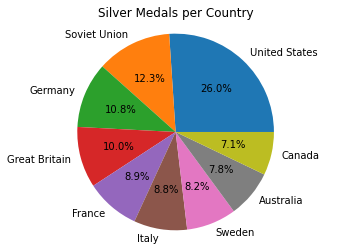

In [29]:
fig = plt.figure()
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Silver Medals per Country")
plt.show()

# Filtremos el df de medallas de bronce por equipo.

In [30]:
bronze_grouped = bronze.groupby('Team')
bronze_filter = bronze_grouped.filter(lambda x: x['Team'].count()>400)
bronze_filter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around


In [31]:
team_count = bronze_filter["Team"].value_counts()
print(team_count)

United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
Australia         511
Sweden            507
Italy             484
Finland           415
Canada            408
Name: Team, dtype: int64


In [32]:
sizes = team_count.tolist()
print(sizes)
labels = team_count.index.tolist()
print(labels)

[1233, 678, 677, 577, 572, 511, 507, 484, 415, 408]
['United States', 'Germany', 'Soviet Union', 'France', 'Great Britain', 'Australia', 'Sweden', 'Italy', 'Finland', 'Canada']


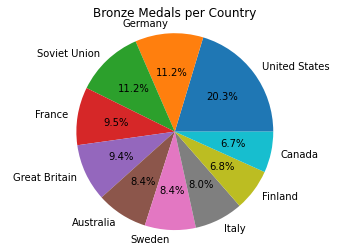

In [33]:
fig = plt.figure()
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Bronze Medals per Country")
plt.show()

# Visualicemos a los tres países más representativos.

United States
<br>Soviet Union
<br>Germany

In [34]:
labels = ['Gold', 'Silver', 'Bronze']

In [35]:
countries = ['United States', 'Soviet Union', 'Germany']

In [36]:
gold_medals = []
for country in countries:
    count = gold_filter["Team"].value_counts()[country]
    gold_medals.append(count)
print(gold_medals)

[2474, 1058, 679]


In [37]:
silver_medals = []
for country in countries:
    count = silver_filter["Team"].value_counts()[country]
    silver_medals.append(count)
print(silver_medals)

[1512, 716, 627]


In [38]:
bronze_medals = []
for country in countries:
    count = bronze_filter["Team"].value_counts()[country]
    bronze_medals.append(count)
print(bronze_medals)

[1233, 677, 678]


In [39]:
medal_count = [sum(x) for x in zip(gold_medals, silver_medals, bronze_medals)]
print(medal_count)

[5219, 2451, 1984]


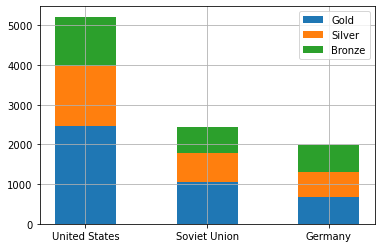

In [40]:
fig = plt.figure()
width = 0.5

plt.bar(countries, gold_medals, width, label = 'Gold')

bottom = gold_medals
plt.bar(countries, silver_medals, width, bottom = bottom, label = 'Silver')

bottom = [sum(x) for x in zip(gold_medals, silver_medals)]
plt.bar(countries, bronze_medals, width, bottom = bottom, label = 'Bronze')

plt.grid(True) 
plt.legend()
plt.show()

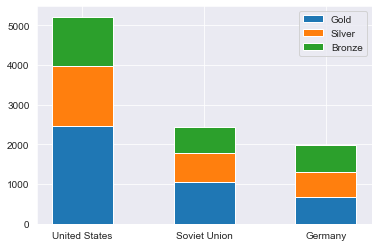

In [41]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
width = 0.5

plt.bar(countries, gold_medals, width, label = 'Gold')

bottom = gold_medals
plt.bar(countries, silver_medals, width, bottom = bottom, label = 'Silver')

bottom = [sum(x) for x in zip(gold_medals, silver_medals)]
plt.bar(countries, bronze_medals, width, bottom = bottom, label = 'Bronze')

plt.grid(True) 
plt.legend()
plt.show()

# ¿Qué más podemos hacer con estos datos?

In [42]:
gold_filter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
150,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Team"
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball
200,93,Jol Marc Abati,M,38.0,190.0,85.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball
218,106,Agostino Abbagnale,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls


In [43]:
gold_filter["Sex"].value_counts()

M    5219
F    1806
Name: Sex, dtype: int64

In [44]:
silver_filter["Sex"].value_counts()

M    4187
F    1618
Name: Sex, dtype: int64

In [45]:
bronze_filter["Sex"].value_counts()

M    4359
F    1703
Name: Sex, dtype: int64

In [46]:
sex_ = df["Sex"].value_counts()
print(sex_)

M    196594
F     74522
Name: Sex, dtype: int64


In [47]:
sex_count = sex_[0] + sex_[1]
print(sex_count)
print(contenders)

271116
271116


In [48]:
sport_ = df["Sport"].value_counts()
print(sport_)

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64


In [49]:
sport_count = 0
for i in range(sport_.size):
    sport_count = sport_count + sport_[i]
print(sport_count)
print(contenders)

271116
271116


In [50]:
season_ = df["Season"].value_counts()
print(season_)

Summer    222552
Winter     48564
Name: Season, dtype: int64


In [51]:
season_count = season_[0] + season_[1]
print(season_count)
print(contenders)

271116
271116
